In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\13460\Desktop\PHBS\MLF\Kaggle-Give-Me-Some-Data\cs-training.csv') 
df.head()  #df.shape

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)


In [7]:
from sklearn.datasets import load_iris
iris = load_iris() # Load the iris dataset

In [8]:
from sklearn.model_selection import train_test_split # Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.72551423, 0.23000922, 0.03960774])

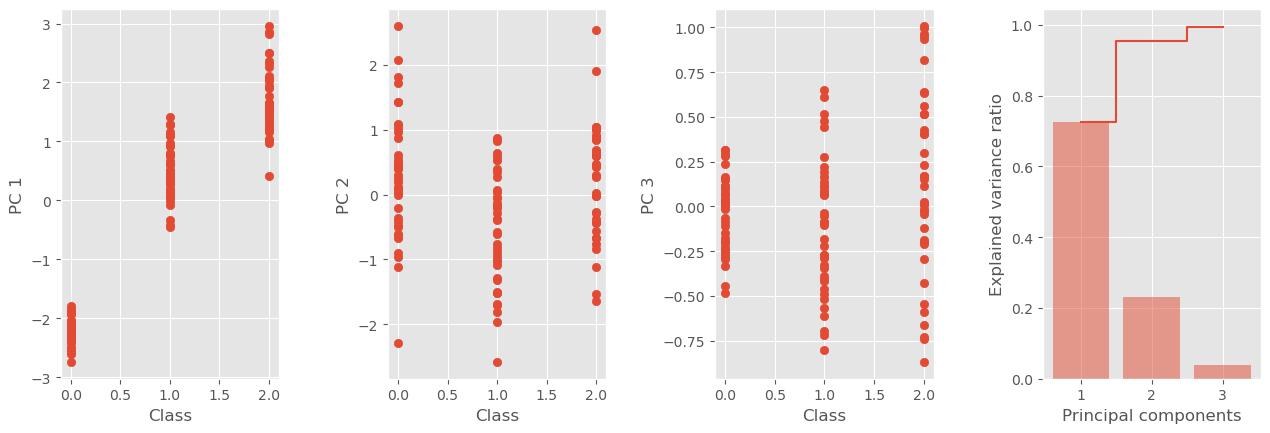

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.subplot(141)
plt.scatter(y_train, X_train_pca[:, 0])
plt.xlabel('Class')
plt.ylabel('PC 1')
plt.subplot(142)
plt.scatter(y_train, X_train_pca[:, 1])
plt.xlabel('Class')
plt.ylabel('PC 2')
plt.subplot(143)
plt.scatter(y_train, X_train_pca[:, 2])
plt.xlabel('Class')
plt.ylabel('PC 3')
plt.subplot(144)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.subplots_adjust(right=2, wspace=0.5)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
# simply using c chosen in previous HW 😀
c=0.08
lr = LogisticRegression(penalty='l1', C=c, solver='liblinear',  random_state=0)
lr = lr.fit(X_train_pca, y_train)
print(f'Accuracy when [c={c}] \nTrain {lr.score(X_train_pca, y_train)}\nTest  {lr.score(X_test_pca, y_test)}')

Accuracy when [c=0.08] 
Train 0.8166666666666667
Test  0.8333333333333334


In [13]:
from sklearn.svm import SVC
# simply using g chosen in previous HW 😀
g = 0.25
svm = SVC(kernel='rbf', gamma=g, random_state=0)
svm.fit(X_train_pca, y_train)
print(f'Accuracy when [gamma={g}] \nTrain {svm.score(X_train_pca, y_train)}\nTest  {svm.score(X_test_pca, y_test)}')

Accuracy when [gamma=0.25] 
Train 0.975
Test  1.0


In [14]:
from sklearn.tree import DecisionTreeClassifier
# simply using depth chosen in previous HW 😀
depth = 5
tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
tree.fit(X_train_pca, y_train)
print(f'Accuracy when [gamma={g}] \nTrain {tree.score(X_train_pca, y_train)}\nTest  {tree.score(X_test_pca, y_test)}')

Accuracy when [gamma=0.25] 
Train 1.0
Test  0.9333333333333333


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# simply using c, g, depth chosen in previous HW 😀
c, g, depth = 0.08, 0.25, 5
# Assign pipes:
## Logistic regression
pipe_lr =make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(penalty='l1', C=c, solver='liblinear',  random_state=0))
## SVM
pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        SVC(kernel='rbf', gamma=g, random_state=0))
## Decision tree
pipe_tree = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0))

In [21]:
# Model accuray interation
for model in [pipe_lr, pipe_svm, pipe_tree]:
    X_train, X_test, y_train, y_test =\
    train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    # print(np.isnan(X_train).any(), np.isnan(y_train).any(), np.isnan(X_test).any(),np.isnan(y_test).any())
    y_pred = model.predict(X_test)
    print(f'Pipeline: {model.named_steps.keys()}\nAccuracy of : {model.score(X_test, y_test)}\n') # only in Python>=3.7

Pipeline: dict_keys(['standardscaler', 'pca', 'logisticregression'])
Accuracy of : 0.8333333333333334

Pipeline: dict_keys(['standardscaler', 'pca', 'svc'])
Accuracy of : 1.0

Pipeline: dict_keys(['standardscaler', 'pca', 'decisiontreeclassifier'])
Accuracy of : 0.9333333333333333



In [22]:
from sklearn.model_selection import GridSearchCV

pipe_lr = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         LogisticRegression(penalty='l1', C=c, solver='liblinear',  random_state=0))

param_range = [ 1e-05, 1e-04, 1e-03, 1e-02, 0.1, 1, 10, 100, 1000]

param_grid = [{'logisticregression__C': param_range,
               'logisticregression__penalty': ['l1'],
               'logisticregression__solver': ['liblinear']},
              {'logisticregression__C': param_range,
               'logisticregression__penalty': ['l2']}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9416666666666667
{'logisticregression__C': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [23]:
clf = gs.best_estimator_
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 1.000
